For this analyze I thought I used the three questions belong:

What is and how many people work with professional post that graduated in some other are?

Which country there is more professional?

Which post these professionals occupied?

I thought in this questions for try to understand how many posts to be occupied for people that in some moment of yours life decided to change of career.


In [74]:
#first I neeed import the necessary libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from  collections import defaultdict


%matplotlib inline

In [2]:
df = pd.read_csv('Desktop/documentos/projetos/data_science/nano/project_one/survey_results_public_2020.csv')

In [3]:
schema = pd.read_csv('Desktop/documentos/projetos/data_science/nano/project_one/survey_results_schema_2020.csv')

In [4]:
schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


In [5]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


UNDERSTADING THE DIVISION OF THE GROUPS 

Look for the two Data Frames, I decided to use just the data of the people that considered yourself a “I am a developer by profession”, for this a filtered the Data Frame for show just this group. After I used the UndergradMajor to understand the distribution of the people in different areas. 


In [6]:
#use this for take the question of the schema 

schema[schema['Column'] == 'MainBranch'][schema.columns[-1]].values[0]

'Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."'

In [7]:
df_developer = df[df['MainBranch'] == 'I am a developer by profession']

In [8]:
# Here there is a filtered the Data Frame  

df_developer

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
5,6,I am a developer by profession,No,NaN,14,NaN,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,React.js,NaN,NaN,NaN,6,4
6,7,I am a developer by profession,Yes,NaN,18,Monthly,NaN,NaN,India,United States dollar,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,A lot more welcome now than last year,NaN,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64154,65631,I am a developer by profession,Yes,NaN,13,Yearly,4310000.0,38759.0,Japan,Japanese yen,...,NaN,NaN,NaN,Web development or web design,NaN,NaN,NaN,40.0,5,Less than 1 year
64155,65632,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Australia,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64157,65634,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Philippines,NaN,...,NaN,NaN,NaN,NaN,React.js,React.js,NaN,NaN,NaN,NaN
64158,65635,I am a developer by profession,Yes,NaN,15,NaN,NaN,NaN,Philippines,NaN,...,NaN,NaN,NaN,"Information systems, information technology, o...",NaN,NaN,NaN,NaN,6,Less than 1 year


In [10]:
schema[schema['Column'] == 'UndergradMajor'][schema.columns[-1]].values[0]

'What was your primary field of study?'

In [51]:
# Use this method for have a first view of division by areas 

df_developer['UndergradMajor'].value_counts()

Computer science, computer engineering, or software engineering                   26328
Another engineering discipline (such as civil, electrical, mechanical, etc.)       3393
Information systems, information technology, or system administration              3060
A natural science (such as biology, chemistry, physics, etc.)                      1485
Web development or web design                                                      1385
Mathematics or statistics                                                          1282
A business discipline (such as accounting, finance, marketing, etc.)                880
A humanities discipline (such as literature, history, philosophy, etc.)             768
A social science (such as anthropology, psychology, political science, etc.)        583
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      543
I never declared a major                                                            280
A health science (such as nursin

In [9]:
#Here is possible to see how many values is missing 

df_developer['UndergradMajor'].isnull().sum()

7090

In [10]:
# clean the data 

df_developer['UndergradMajor'].dropna()


0        Computer science, computer engineering, or sof...
1        Computer science, computer engineering, or sof...
3        Computer science, computer engineering, or sof...
6        Computer science, computer engineering, or sof...
7        Computer science, computer engineering, or sof...
                               ...                        
64150    Computer science, computer engineering, or sof...
64152    Computer science, computer engineering, or sof...
64153    Information systems, information technology, o...
64154                        Web development or web design
64158    Information systems, information technology, o...
Name: UndergradMajor, Length: 40103, dtype: object

In [11]:
# Use the variable grads_index for make easier the graphs 

grads_index = df_developer['UndergradMajor'].value_counts().index

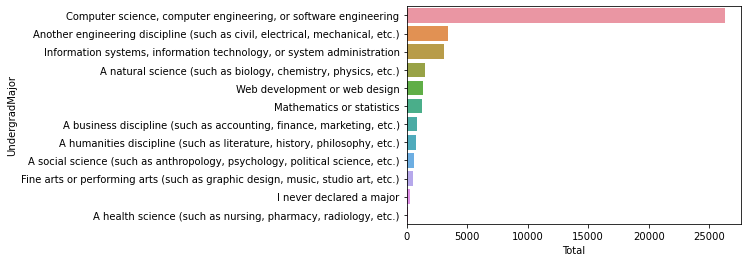

In [12]:
#this graphic shows the values with missing values

sb.countplot(data = df_developer, y = df_developer['UndergradMajor'], order = grads_index);


plt.xlabel('Total');

WHERE THIS PEOPLE LIVE ?

Taking the Country column I can answer this question, and see how is distribuitated two groups 

In [18]:
df_developer['Country'].isnull().sum()

185

In [19]:
df_developer['Country'].dropna()

0               Germany
1        United Kingdom
3               Albania
5               Germany
6                 India
              ...      
64154             Japan
64155         Australia
64157       Philippines
64158       Philippines
64159         Argentina
Name: Country, Length: 47008, dtype: object

In [20]:
# First I take the total of programmers by country 

prof_1 = df_developer["Country"].value_counts().reset_index()
prof_1

,index,Country
0,United States,9456
1,India,6080
2,United Kingdom,3020
3,Germany,2877
4,Canada,1632
...,...,...
170,Sierra Leone,1
171,Kiribati,1
172,Chad,1
173,Brunei Darussalam,1


In [21]:
#take the professional developer that gratuated in other area, around the world. 

df_by_country =df_developer[df_developer['UndergradMajor'] != 'Computer science, computer engineering, or software engineering']

In [22]:
prof_2 = df_by_country["Country"].value_counts().reset_index()

prof_2

,index,Country
0,United States,4328
1,India,2471
2,United Kingdom,1501
3,Germany,1238
4,Brazil,683
...,...,...
159,Mauritania,1
160,"Congo, Republic of the...",1
161,Chad,1
162,Democratic Republic of the Congo,1


In [23]:
No_TI= pd.DataFrame(prof_2.rename(columns={'index': "Country", "Country":'Other Area'}))

No_TI

,Country,Other Area
0,United States,4328
1,India,2471
2,United Kingdom,1501
3,Germany,1238
4,Brazil,683
...,...,...
159,Mauritania,1
160,"Congo, Republic of the...",1
161,Chad,1
162,Democratic Republic of the Congo,1


In [24]:
# I use this, and the next cell,  to make a new DataFrame with the professionals in TI major and Other areas

df_profession = pd.DataFrame(prof_1.rename(columns={'index' : "Country", "Country":'Total'}))

df_profession

,Country,Total
0,United States,9456
1,India,6080
2,United Kingdom,3020
3,Germany,2877
4,Canada,1632
...,...,...
170,Sierra Leone,1
171,Kiribati,1
172,Chad,1
173,Brunei Darussalam,1


In [25]:
# I make in this to think easier for put all columns together 

df_profession['Only TI']=  df_profession['Total'] - No_TI['Other Area']

df_profession

,Country,Total,Only TI
0,United States,9456,5128.0
1,India,6080,3609.0
2,United Kingdom,3020,1519.0
3,Germany,2877,1639.0
4,Canada,1632,949.0
...,...,...,...
170,Sierra Leone,1,NaN
171,Kiribati,1,NaN
172,Chad,1,NaN
173,Brunei Darussalam,1,NaN


In [26]:
df_profession["Other"] = No_TI['Other Area']

df_profession

,Country,Total,Only TI,Other
0,United States,9456,5128.0,4328.0
1,India,6080,3609.0,2471.0
2,United Kingdom,3020,1519.0,1501.0
3,Germany,2877,1639.0,1238.0
4,Canada,1632,949.0,683.0
...,...,...,...,...
170,Sierra Leone,1,NaN,NaN
171,Kiribati,1,NaN,NaN
172,Chad,1,NaN,NaN
173,Brunei Darussalam,1,NaN,NaN


In [27]:
# See the procentagem of professionals with other areas working how professional developer.

df_profession['Mean'] = (df_profession["Other"]* 100)/ df_profession['Total']

df_profession

,Country,Total,Only TI,Other,Mean
0,United States,9456,5128.0,4328.0,45.769882
1,India,6080,3609.0,2471.0,40.641447
2,United Kingdom,3020,1519.0,1501.0,49.701987
3,Germany,2877,1639.0,1238.0,43.030935
4,Canada,1632,949.0,683.0,41.850490
...,...,...,...,...,...
170,Sierra Leone,1,NaN,NaN,NaN
171,Kiribati,1,NaN,NaN,NaN
172,Chad,1,NaN,NaN,NaN
173,Brunei Darussalam,1,NaN,NaN,NaN


In [28]:
df_profession.dropna()

,Country,Total,Only TI,Other,Mean
0,United States,9456,5128.0,4328.0,45.769882
1,India,6080,3609.0,2471.0,40.641447
2,United Kingdom,3020,1519.0,1501.0,49.701987
3,Germany,2877,1639.0,1238.0,43.030935
4,Canada,1632,949.0,683.0,41.850490
...,...,...,...,...,...
159,Papua New Guinea,1,0.0,1.0,100.000000
160,Mauritania,1,0.0,1.0,100.000000
161,"Congo, Republic of the...",1,0.0,1.0,100.000000
162,North Korea,1,0.0,1.0,100.000000


In [38]:
# this cell and the next, it is just for curiosity.

df_profession[df_profession['Mean'] == df_profession['Mean'].min()]

,Country,Total,Only TI,Other,mean
145,Malawi,3,2.0,1.0,33.333333
146,Guyana,3,2.0,1.0,33.333333
147,Mozambique,3,2.0,1.0,33.333333
148,Turkmenistan,3,2.0,1.0,33.333333


In [32]:
df_profession[df_profession['Mean'] == df_profession['Mean'].max()]

,Country,Total,Only TI,Other,Mean
153,Mali,1,0.0,1.0,100.0
154,Belize,1,0.0,1.0,100.0
155,Grenada,1,0.0,1.0,100.0
156,Liechtenstein,1,0.0,1.0,100.0
157,Burundi,1,0.0,1.0,100.0
158,Lesotho,1,0.0,1.0,100.0
159,Papua New Guinea,1,0.0,1.0,100.0
160,Mauritania,1,0.0,1.0,100.0
161,"Congo, Republic of the...",1,0.0,1.0,100.0
162,North Korea,1,0.0,1.0,100.0


WHAT POST THIS PEOPLE OCCUPIED?

In column is possible see what obligations each one have. Here 

In [62]:
df_by_country['DevType'].value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                      1605
Developer, back-end                                                                                                                                                                                                                                                                        1031
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                                                                                              817
Developer, front-end                                                                                                                    

In [63]:
df_by_country['DevType'].isnull().sum()

4465

In [64]:
# just clean the data

df_by_country['DevType'].dropna()

5          Designer;Developer, front-end;Developer, mobile
9        Database administrator;Developer, full-stack;D...
11                           Designer;Developer, front-end
19           Developer, desktop or enterprise applications
22       Developer, back-end;Developer, desktop or ente...
                               ...                        
64144                                  Developer, back-end
64147           Developer, full-stack;System administrator
64153    Developer, full-stack;Developer, QA or test;Sy...
64154                                 Developer, front-end
64158    Developer, back-end;Developer, desktop or ente...
Name: DevType, Length: 16400, dtype: object



How each person can choose more one option, I tried to split the answer to take just one type of each option. I made two analyses one for the Computer Science group and other for the other group, to see if there is diffenrence.




In [75]:
def unique_response(df, col1, col2, look_for):
     
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column with the values for count
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    ''' 
        
    new_df = defaultdict(int)
    for val in look_for:
        for idx in range (df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1,col2]
    new_df.sort_values('Total', ascending= False, inplace=True)
    return new_df

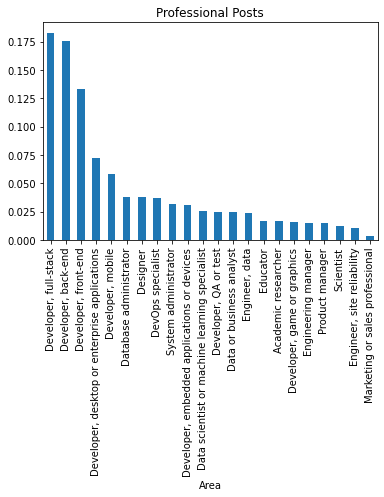

In [76]:
# I this there is each single possible response from resarch

types= ['Academic researcher','Data or business analyst','Data scientist or machine learning specialist',
        'Database administrator','Designer','Developer, back-end','Developer, desktop or enterprise applications',
        'Developer, embedded applications or devices','Developer, front-end','Developer, full-stack',
        'Developer, game or graphics','Developer, mobile','Developer, QA or test','DevOps specialist',
        'Educator','Engineer, data','Engineer, site reliability','Engineering manager','Marketing or sales professional',
        'Product manager','Scientist','Senior Executive (C-Suite, VP, etc.)','System administrator','Other']

def clean_and_plot(df, title='Professional Posts', plot=True):

    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        types programmers there is the origianl dataframe
    '''
    
    dev_type = df_by_country['DevType'].value_counts().reset_index()
    dev_type.rename(columns={'index': 'Area', 'DevType':'Total'}, inplace= True)
    dev_type_df = unique_response(dev_type, 'Area', 'Total', types)

    dev_type_df.set_index('Area', inplace=True)
    if plot:
        (dev_type_df/dev_type_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    unique_dev_type_df = dev_type_df/dev_type_df.sum()
    return  unique_dev_type_df
    
types_df = clean_and_plot(df)

In [79]:
# here is possible to see without the plot, just the table 

dev_type = df_by_country['DevType'].value_counts().reset_index()
dev_type.rename(columns={'index': 'Area', 'DevType':'Total'}, inplace= True)
dev_type_df = unique_response(dev_type, 'Area', 'Total', types)

In [80]:
dev_type_df

,Area,Total
9,"Developer, full-stack",9470
5,"Developer, back-end",9108
8,"Developer, front-end",6879
6,"Developer, desktop or enterprise applications",3745
11,"Developer, mobile",3017
3,Database administrator,1983
4,Designer,1943
13,DevOps specialist,1900
21,System administrator,1660
7,"Developer, embedded applications or devices",1595



looking the analyses is possible to see that the technology area accepeted very well the group of people that want change your carrer, and in some countries the percentage of this group it is almost half of the total. For the people that want to move now, there is a lot of post that still have a low number of professional, one times that there is more developer, in general, than others posts.